In [1]:
!pip install pandas numpy scipy kaleido==0.2.1 matplotlib pyarrow pooch seaborn plotly xarray ipywidgets

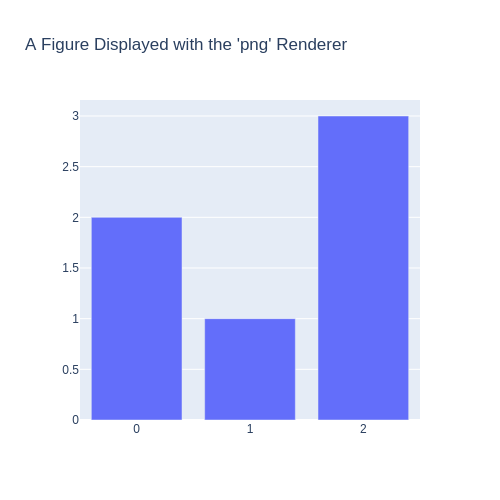

In [2]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500

pio.renderers.default = "png"

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'png' Renderer"
)
fig.show()

In [3]:
import plotly.express as px
import xarray as xr
from IPython.display import Image
from matplotlib import pyplot as plt
import random
import numpy as np

In [4]:
import pandas as pd
# uncomment to add 2024 year to 2007-2025 
hourly_df4 = pd.read_parquet('./oasis_07_24.parquet')
df2025 = pd.read_csv("2025_nsphourly.csv", parse_dates=["datetime"])
hourly_df = pd.concat([hourly_df4, df2025], ignore_index=True, sort=True)
hourly_df.index = pd.to_datetime(hourly_df['datetime'])
hourly_df = hourly_df.sort_index()

In [5]:
# there was a ' ' missing datapoint 
# (not null, but with a space that caused the dtype of the column to be object), fixed manually by deleting it.
#df2025['load_MW'] = df2025['load_MW'].astype(float)

In [6]:
hourly_df

,datetime,hour_index,load_MW
datetime,,,
2007-01-01 00:00:00,2007-01-01 00:00:00,1,1580.0
2007-01-01 01:00:00,2007-01-01 01:00:00,2,1533.0
2007-01-01 02:00:00,2007-01-01 02:00:00,3,1495.0
2007-01-01 03:00:00,2007-01-01 03:00:00,4,1446.0
2007-01-01 04:00:00,2007-01-01 04:00:00,5,1406.0
...,...,...,...
2025-12-31 19:00:00,2025-12-31 19:00:00,8755,NaN
2025-12-31 20:00:00,2025-12-31 20:00:00,8756,NaN
2025-12-31 21:00:00,2025-12-31 21:00:00,8757,NaN


In [7]:
hourly_df.to_parquet('./oasis_07_25.parquet', compression=None)

In [8]:
hourly_df2 = pd.read_parquet('./oasis_07_25.parquet')
hourly_df2

,datetime,hour_index,load_MW
datetime,,,
2007-01-01 00:00:00,2007-01-01 00:00:00,1,1580.0
2007-01-01 01:00:00,2007-01-01 01:00:00,2,1533.0
2007-01-01 02:00:00,2007-01-01 02:00:00,3,1495.0
2007-01-01 03:00:00,2007-01-01 03:00:00,4,1446.0
2007-01-01 04:00:00,2007-01-01 04:00:00,5,1406.0
...,...,...,...
2025-12-31 19:00:00,2025-12-31 19:00:00,8755,NaN
2025-12-31 20:00:00,2025-12-31 20:00:00,8756,NaN
2025-12-31 21:00:00,2025-12-31 21:00:00,8757,NaN


In [9]:
oasis2 = hourly_df2[['datetime','load_MW']]

In [10]:
import seaborn as sns

In [11]:
df = oasis2.copy()
df['hour'] = df.datetime.dt.hour
df['month'] = df.datetime.dt.month
df['year'] = df.datetime.dt.year
df['day'] = df.datetime.dt.day
df['date'] = df.datetime.dt.date
df['weekdayName'] = df.datetime.dt.day_name() # df.date.dt.weekday_name on older Pandas
df['weekday'] = df.datetime.dt.weekday
#df['week'] = df.datetime.dt.week
df['weekend'] = df.datetime.dt.weekday // 5 == 1

In [12]:
import calendar
hour_abbr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
all_month_year_df = pd.pivot_table(df, values="load_MW",index=["hour"],
                                   columns=["month"],
                                   fill_value=0,
                                   margins=True)
named_index = [[hour_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

month,1,2,3,4,5,6,7,8,9,10,11,12,All
0,1512.809049,1531.777858,1405.514958,1217.460463,1088.224534,1038.411500,1083.715968,1099.034695,1026.886889,1079.150341,1246.707241,1415.058396,1230.876118
1,1471.676587,1499.228976,1378.967267,1182.477426,1038.711237,974.765815,1015.321093,1034.179659,970.800574,1028.350323,1198.619815,1365.699301,1182.240347
2,1442.086061,1470.380912,1352.945419,1152.321278,1004.319068,929.798759,966.521953,985.394086,928.408315,988.102491,1156.304255,1320.901753,1143.813078
3,1420.516265,1451.815419,1332.241080,1132.382111,984.500448,908.620185,944.011953,962.358118,910.163889,968.493333,1138.500037,1296.153082,1122.738880
4,1413.143226,1448.085177,1327.225450,1128.894241,980.133441,900.813815,932.431989,950.921971,902.852056,962.294982,1132.770111,1287.814014,1116.333683
5,1420.984992,1460.143017,1335.837063,1140.603315,989.257921,903.383815,930.405287,949.322168,905.872463,970.085287,1144.712926,1297.775986,1123.074956
6,1459.144686,1499.873892,1373.971154,1179.491204,1019.068208,919.639444,944.894229,968.256756,934.800852,1007.552384,1187.391037,1338.323907,1155.113122
7,1553.221851,1594.786331,1464.463430,1267.359093,1088.212742,985.164870,992.309695,1012.508136,1007.958685,1097.962186,1282.612537,1425.985179,1233.512675
8,1644.230051,1679.696518,1547.498149,1353.193407,1178.419194,1085.550074,1080.255932,1091.781362,1092.364667,1196.510753,1371.363944,1512.082885,1321.861941
9,1687.181511,1713.808696,1583.912988,1391.660667,1226.821111,1147.759833,1159.513620,1169.558226,1145.566000,1240.807401,1407.654833,1563.208065,1372.219827


In [13]:
def plot_heatmap_year3(year):
    #plt.figure(figsize = (30, 6))
    allByYear_df = df.loc[df['year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values="load_MW",
                                  index=["hour"], columns=["date"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[hour_abbr[i] for i in list(allByYear_df.index)]])

    return allByYear_df

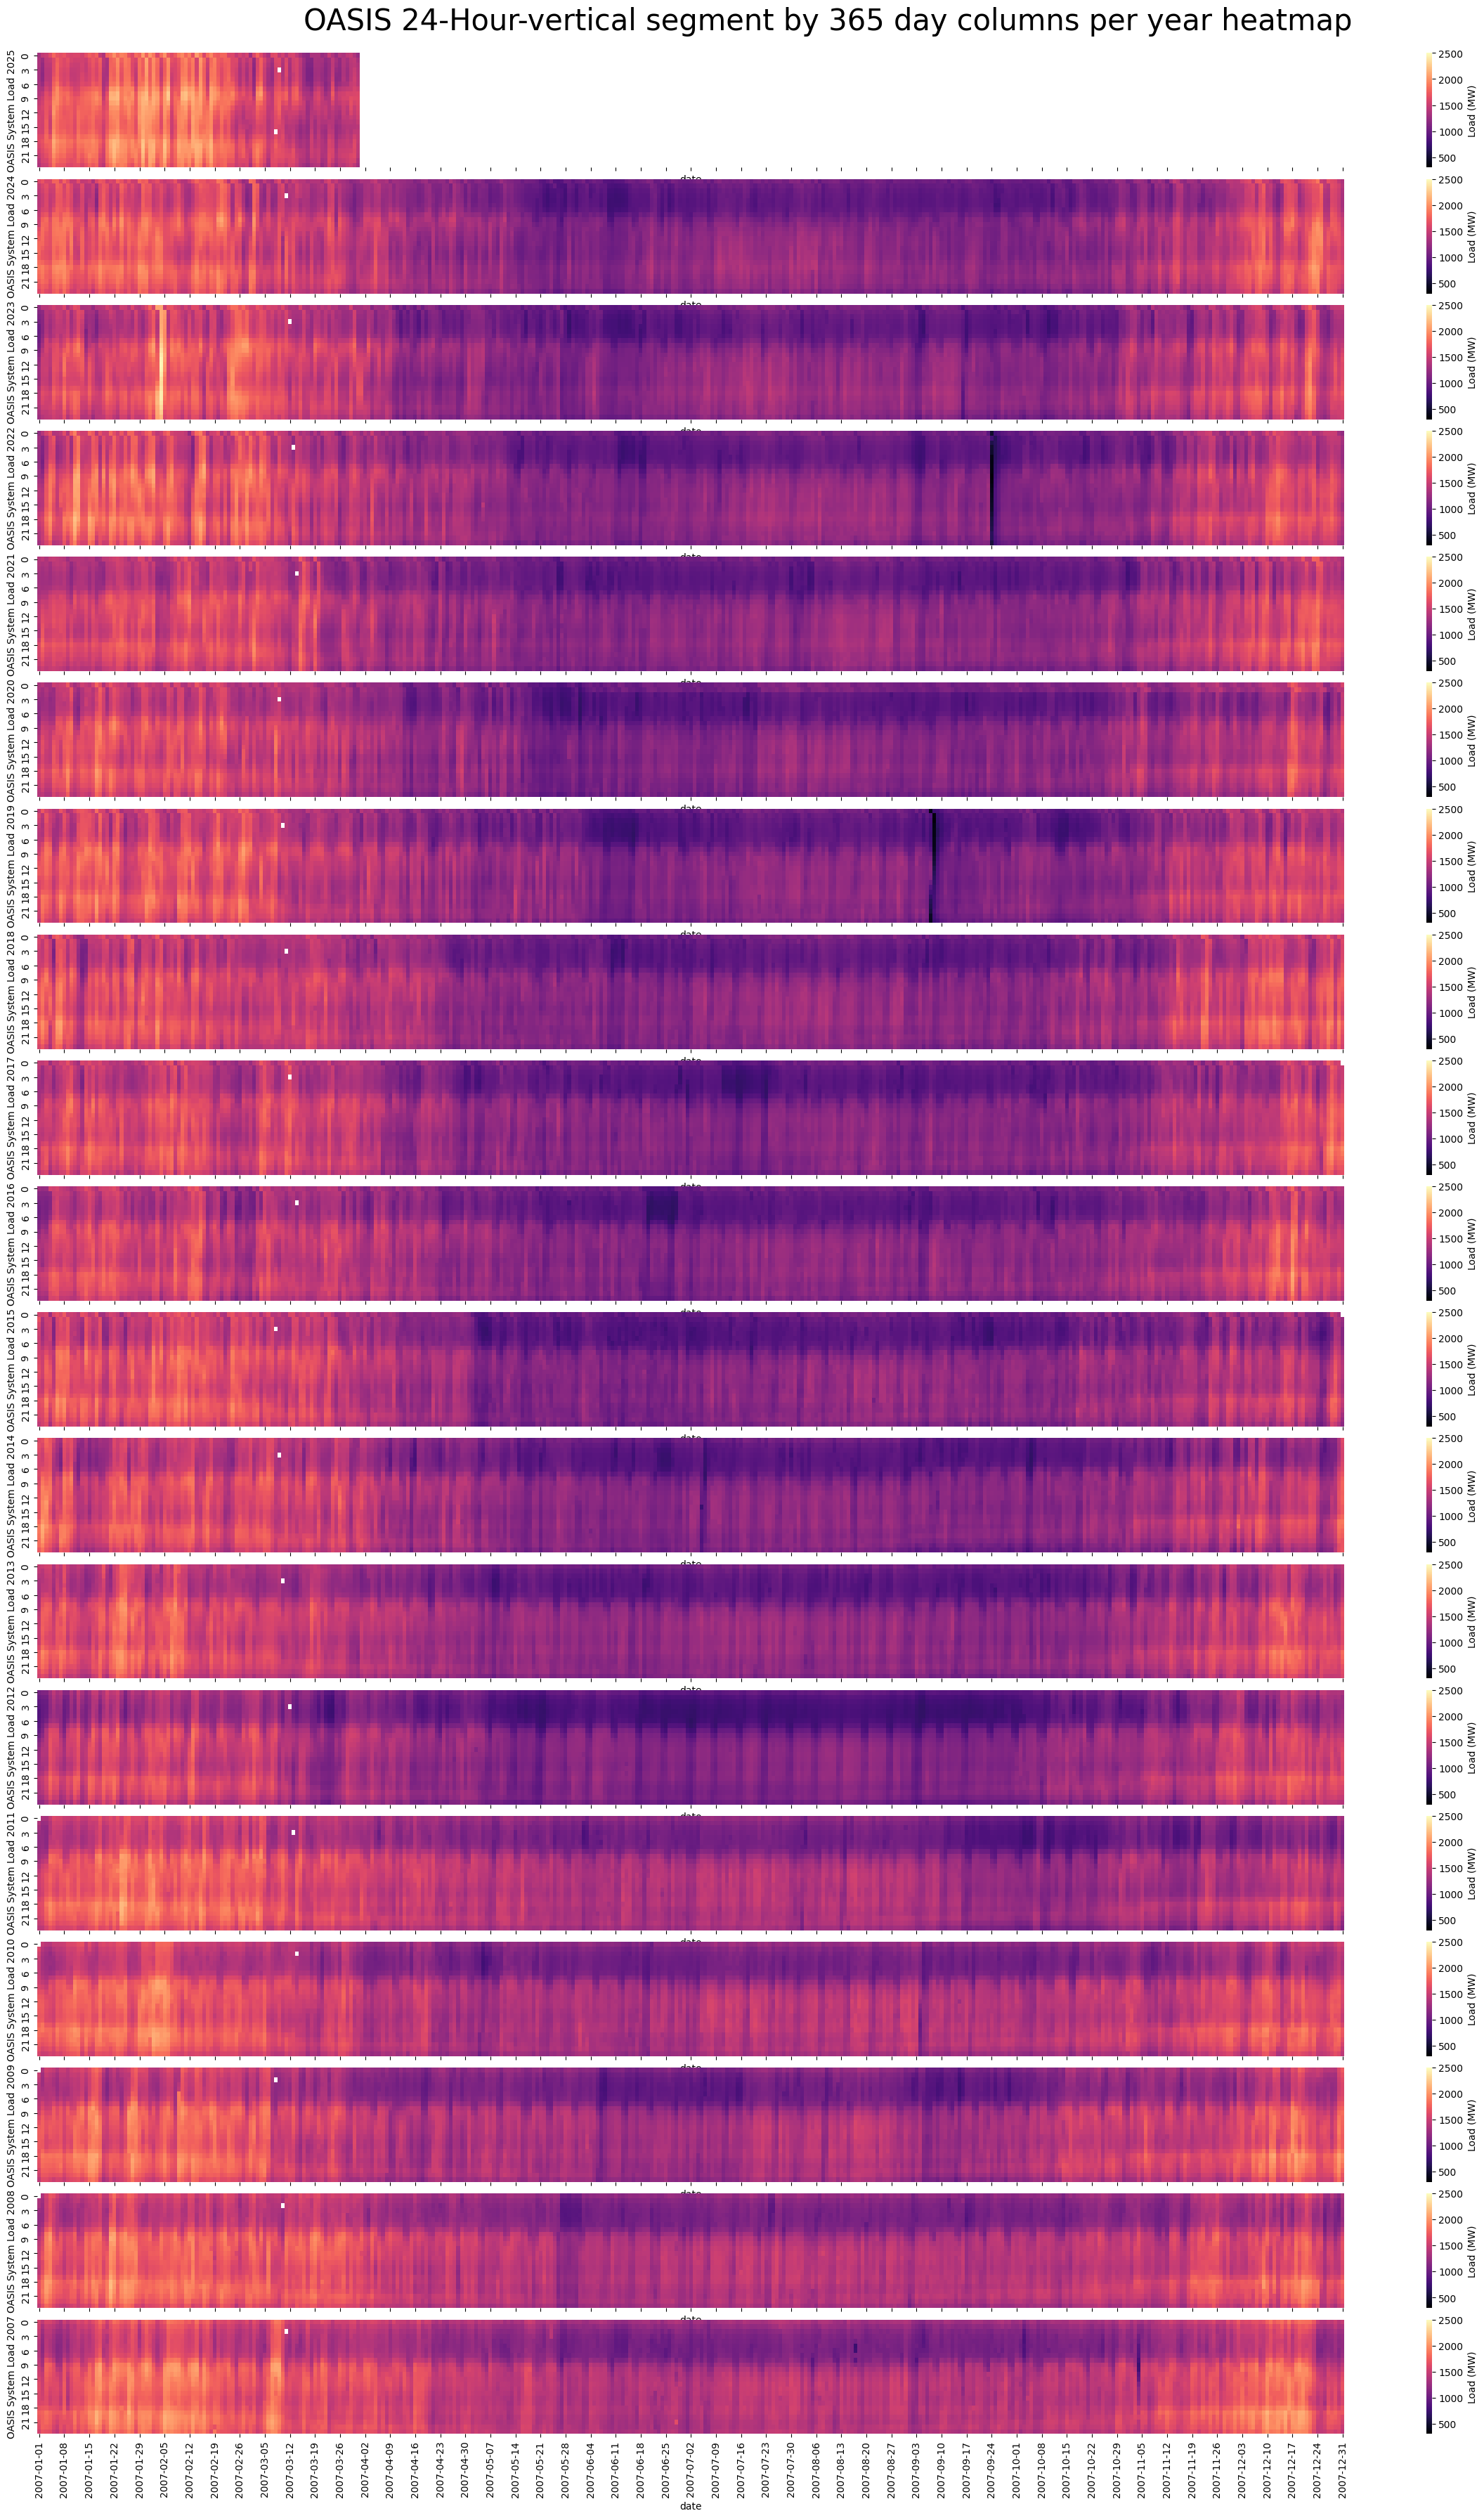

In [14]:
#date_form = mdates.DateFormatter("%b-%d")

fig, axs3 = plt.subplots(19, figsize=(30,44),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

fig.suptitle('OASIS 24-Hour-vertical segment by 365 day columns per year heatmap', y=0.895, ha='center', fontsize=30)

sns.heatmap(ax=axs3[0], data=plot_heatmap_year3(2025), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[1], data=plot_heatmap_year3(2024), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[2], data=plot_heatmap_year3(2023), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[3], data=plot_heatmap_year3(2022), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})
                     #annot_kws={"size": 2}, square=True, cbar_kws={"shrink": .48, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[4], data=plot_heatmap_year3(2021), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[5], data=plot_heatmap_year3(2020), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[6], data=plot_heatmap_year3(2019), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[7], data=plot_heatmap_year3(2018), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[8], data=plot_heatmap_year3(2017), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[9], data=plot_heatmap_year3(2016), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[10], data=plot_heatmap_year3(2015), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[11], data=plot_heatmap_year3(2014), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[12], data=plot_heatmap_year3(2013), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[13], data=plot_heatmap_year3(2012), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[14], data=plot_heatmap_year3(2011), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[15], data=plot_heatmap_year3(2010), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[16], data=plot_heatmap_year3(2009), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[17], data=plot_heatmap_year3(2008), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[18], data=plot_heatmap_year3(2007), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})


yearlist = [2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007]

for year, ax in enumerate(axs3.flat):
    ax.set(ylabel=f'OASIS System Load {yearlist[year]}')#, title='OASIS 24-Hour-vertical segment by 365 day columns per year heatmap')

plt.savefig(fname = "oasis_hourly_figure03a.png", \
                    dpi=125,
                    bbox_inches='tight')